In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from dataloader import DataLoader

from tensorflow.keras import layers, losses
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

2023-12-04 14:16:59.220559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
x_train, y_train, x_test, y_test, longest_graph = DataLoader('../data/test.csv',modelType='gnn', pad = True, fiftyfifty=True).getData()

/Users/aidan/Documents/caterpillar/model


[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not r

/Users/aidan/Documents/caterpillar/model


[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not removing hydrogen atom without neighbors
[14:17:07] WARNING: not r

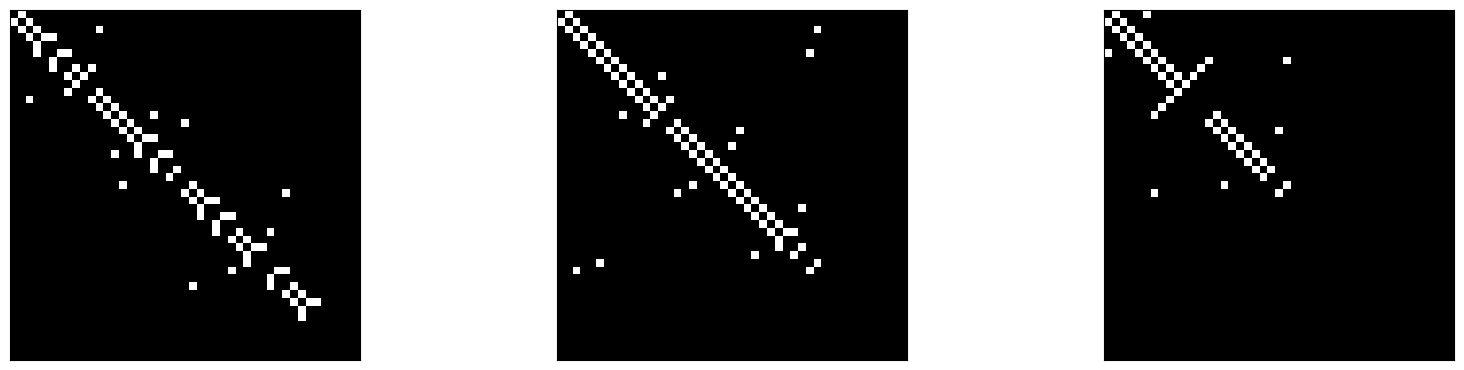

In [4]:
n = 3
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(45*45, activation='relu'),
            layers.Dense(1000, activation='relu'),
            layers.Dense(500, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(500, activation='sigmoid'),
            layers.Dense(1000, activation='sigmoid'),
            layers.Dense(45*45, activation='sigmoid'),
            layers.Reshape((45, 45))
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
def removeDiagonal(adj_matrix):
    #print(adj_matrix)
    for i in range(len(adj_matrix)):
        try:
            adj_matrix[i][i+1] = 0
        except:
            print("IndexError")
        try:
            adj_matrix[i+1][i] = 0
        except:
            print("Index Error")
    return adj_matrix
vfunc = np.vectorize(removeDiagonal)

In [7]:
x_train[0]

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [8]:
x_train = np.asarray(x_train)
x_train = x_train.astype('float32')
x_test = np.asarray(x_test)
x_test = x_test.astype('float32')
for i in range(len(x_train)):
    x_train[i] = removeDiagonal(x_train[i])
for i in range(len(x_test)):
    x_test[i] = removeDiagonal(x_test[i])

IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError
Index Error
IndexError


In [9]:
autoencoder = Autoencoder(latent_dim = 150)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, ## TODO: FIX THIS, SOMETHING ABOUT X_TRAIN FORMAT WRONG
                epochs=40,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/40
23/23 [==============================] - 5s 110ms/step - loss: 0.0316 - val_loss: 0.0083
Epoch 2/40
23/23 [==============================] - 2s 99ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 3/40
23/23 [==============================] - 2s 94ms/step - loss: 0.0076 - val_loss: 0.0083
Epoch 4/40
23/23 [==============================] - 2s 90ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 5/40
23/23 [==============================] - 2s 101ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 6/40
23/23 [==============================] - 2s 92ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 7/40
23/23 [==============================] - 2s 83ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 8/40
23/23 [==============================] - 2s 83ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 9/40
23/23 [==============================] - 2s 83ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 10/40
23/23 [==============================] - 2s 81ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 1

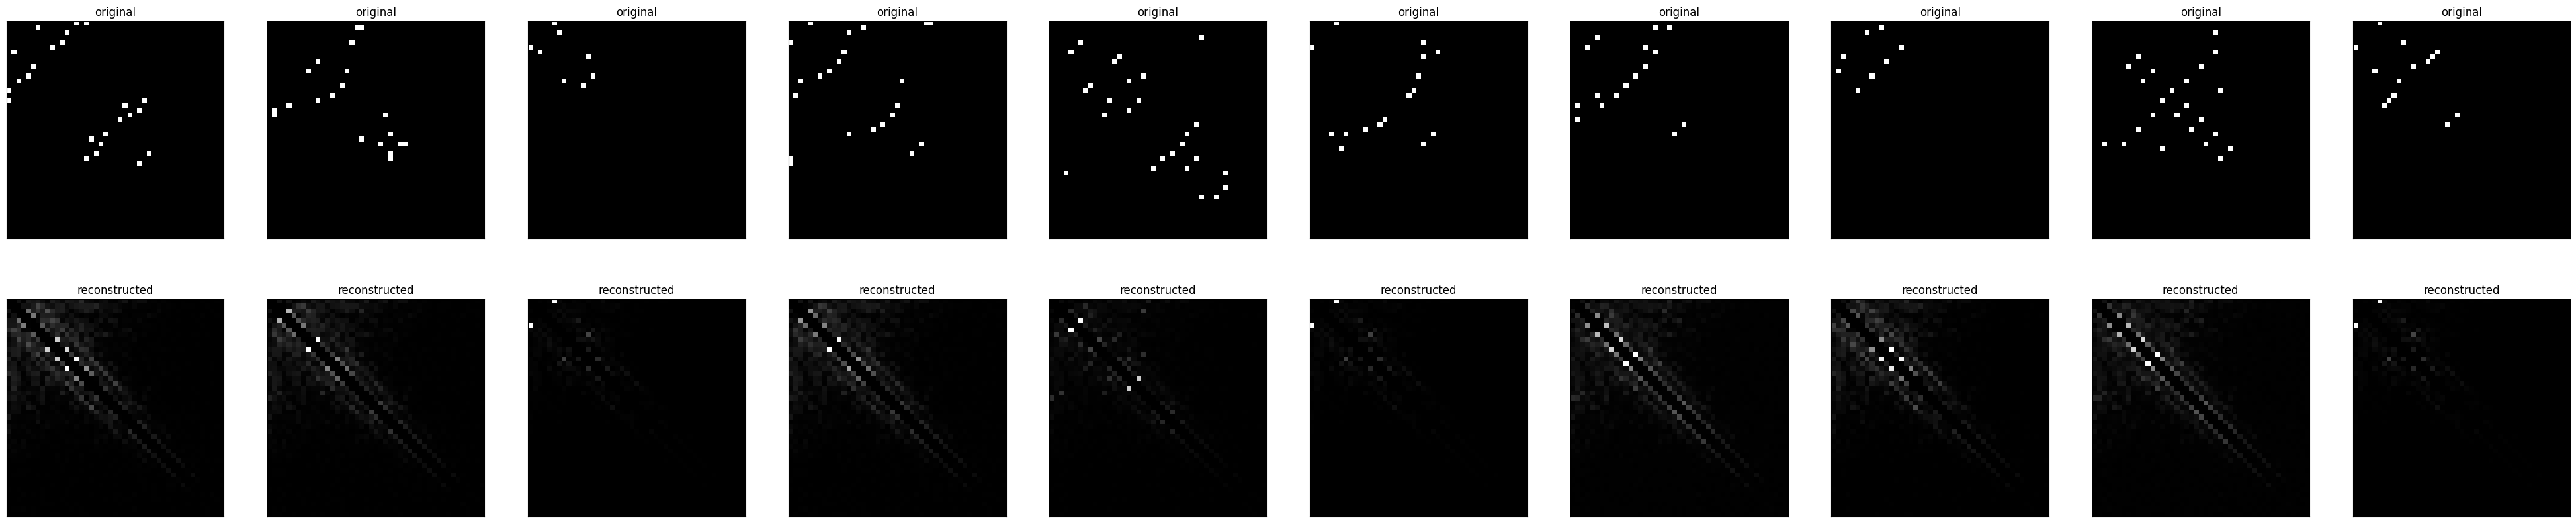

In [10]:
# Visualization cell
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(50, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

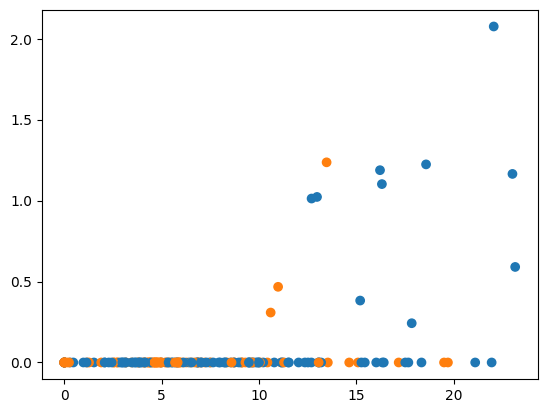

In [11]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],color=["C"+str(i) for i in y_test])

In [12]:
# Classifier
classifier = tf.keras.Sequential([
    layers.Dense(150, activation = 'relu'),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [13]:
classifier_train = autoencoder.encoder(x_train).numpy()
classifier_test = autoencoder.encoder(x_test).numpy()
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [14]:
classifier.compile(optimizer='adam', loss='binary_crossentropy')
classifier.fit(classifier_train, y_train, epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6916
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5922
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5942
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5729
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5705
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5525
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5402
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5446
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5554
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5583
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5513
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5524
Epoch 13/50
23/23 [==============================

In [16]:
y_hat = classifier.predict(classifier_test)
#print(y_hat)
right = 0
for i in range(len(y_hat)):
    t = 0
    if y_hat[i] > 0.5:
        t = 1
    if t == y_test[i]:
        right += 1
print(right/len(y_test))

6/6 [==============================] - 0s 2ms/step
0.712707182320442
